# Start protocol of MicEASH

## 1. Add information to spot data

In [11]:
from miceash.preprocess import preprocess
path_1 = "../test_data"
df_preprocessed_rep1 = preprocess(data_path=path_1, posi_file="DNAseqFISH+1Mbloci-E14-replicate1.csv", anno_file="science.abj1966_table_s1.xlsx")

In [6]:
df_preprocessed_rep1

,fov,cellID,channel,geneID,x,y,z,seeds,intensity,regionID,chromID,Chrom,Start,End,hyb
0,0,1,1,chr1-#1,1690.475,166.783,23.218447,5,1690,1.0,1.0,chr1,3100000.0,3125000.0,0
1,0,1,1,chr1-#11,1691.842,148.135,24.655340,5,1692,18.0,1.0,chr1,23000000.0,23025000.0,17
2,0,1,1,chr1-#13,1611.480,202.516,24.235437,4,1611,22.0,1.0,chr1,27225000.0,27250000.0,21
3,0,1,1,chr1-#13,1700.680,144.291,23.038835,4,1701,22.0,1.0,chr1,27225000.0,27250000.0,21
4,0,1,1,chr1-#13,1603.773,185.353,21.109223,5,1604,22.0,1.0,chr1,27225000.0,27250000.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705138,4,31,2,Nhs,1418.862,317.295,14.599515,5,1419,2452.0,20.0,chrX,162147230.0,162172230.0,111
705139,4,31,2,Gpm6b,1415.958,319.630,19.184466,3,1416,2456.0,20.0,chrX,166226411.0,166251411.0,115
705140,4,31,2,Tlr7,1418.340,323.033,23.216019,4,1403,2458.0,20.0,chrX,167318058.0,167343058.0,117
705141,4,31,2,Mid1,1418.039,325.208,26.677184,3,1418,2460.0,20.0,chrX,169672699.0,169697699.0,119


In [7]:
path_1 = "../test_data"
df_preprocessed_rep2 = preprocess(data_path=path_1, posi_file="DNAseqFISH+1Mbloci-E14-replicate2.csv", anno_file="science.abj1966_table_s1.xlsx")

In [8]:
df_preprocessed_rep2

,Unnamed: 0,fov,cellID,channel,geneID,x,y,z,seeds,intensity,regionID,chromID,Chrom,Start,End,hyb
0,0,0,1,1,chr1-#1,1540.779,609.259,19.550971,5,1541,1.0,1.0,chr1,3100000.0,3125000.0,0
1,1,0,1,1,chr1-#10,1553.183,555.433,17.900485,3,1553,16.0,1.0,chr1,21000000.0,21025000.0,15
2,2,0,1,1,chr1-#10,1566.682,649.353,21.012136,4,1567,16.0,1.0,chr1,21000000.0,21025000.0,15
3,3,0,1,1,chr1-#10,1527.367,615.795,20.635922,5,1527,16.0,1.0,chr1,21000000.0,21025000.0,15
4,4,0,1,1,chr1-#10,1522.098,618.650,18.800971,5,1522,16.0,1.0,chr1,21000000.0,21025000.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090080,1090080,5,38,2,Mbtps2,199.360,477.389,28.475728,5,199,2447.0,20.0,chrX,157586215.0,157611215.0,106
1090081,1090081,5,38,2,Rps6ka3,194.616,473.410,32.711165,4,195,2449.0,20.0,chrX,159197807.0,159222807.0,108
1090082,1090082,5,38,2,Phka2,191.340,476.420,32.689320,4,191,2450.0,20.0,chrX,160489666.0,160514666.0,109
1090083,1090083,5,38,2,Nhs,197.233,485.211,32.507282,5,197,2452.0,20.0,chrX,162147230.0,162172230.0,111


## 2. Align spots to each allele

In [9]:
from miceash.align import align
path_1 = "../test_data"
df_preprocessed_align_rep1 = align(path_1, "DNAseqFISH+1Mbloci-E14-replicate1_preprocessed.csv", "kmeans")
df_preprocessed_align_rep1 

,fov,cellID,channel,geneID,x,y,z,seeds,intensity,regionID,chromID,Chrom,Start,End,hyb,Allele,marked
0,0,1,1,chr1-#1,1690.475,166.783,23.218447,5,1690,1.0,1.0,chr1,3100000.0,3125000.0,0,1,1
1,0,1,1,chr1-#11,1691.842,148.135,24.655340,5,1692,18.0,1.0,chr1,23000000.0,23025000.0,17,1,1
2,0,1,1,chr1-#13,1611.480,202.516,24.235437,4,1611,22.0,1.0,chr1,27225000.0,27250000.0,21,0,1
3,0,1,1,chr1-#13,1700.680,144.291,23.038835,4,1701,22.0,1.0,chr1,27225000.0,27250000.0,21,1,1
4,0,1,1,chr1-#13,1603.773,185.353,21.109223,5,1604,22.0,1.0,chr1,27225000.0,27250000.0,21,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705138,4,31,2,Nhs,1418.862,317.295,14.599515,5,1419,2452.0,20.0,chrX,162147230.0,162172230.0,111,0,0
705139,4,31,2,Gpm6b,1415.958,319.630,19.184466,3,1416,2456.0,20.0,chrX,166226411.0,166251411.0,115,0,0
705140,4,31,2,Tlr7,1418.340,323.033,23.216019,4,1403,2458.0,20.0,chrX,167318058.0,167343058.0,117,0,0
705141,4,31,2,Mid1,1418.039,325.208,26.677184,3,1418,2460.0,20.0,chrX,169672699.0,169697699.0,119,0,0


In [10]:
path_1 = "../test_data"
df_preprocessed_align_rep2 = align(path_1, "DNAseqFISH+1Mbloci-E14-replicate2_preprocessed.csv", "kmeans")

## 3. Visualize allelic information

In [1]:
from miceash.plot import DataPlotter
plotter = DataPlotter()

In [2]:
import pandas as pd
import os
path_1 = "../test_data"
df_preprocessed_align_rep1 = pd.read_csv(os.path.join(path_1, "analysis", "DNAseqFISH+1Mbloci-E14-replicate1_preprocessed_marked.csv"))

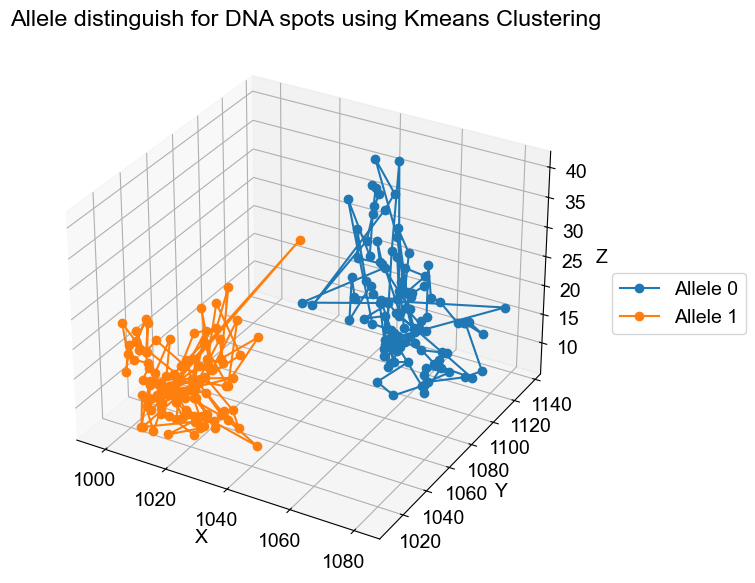

In [3]:
from miceash.plot import DataPlotter
plotter = DataPlotter()
df_filtered = df_preprocessed_align_rep1[(df_preprocessed_align_rep1['cellID'] == 10) & (df_preprocessed_align_rep1['fov'] == 3) & (df_preprocessed_align_rep1['Chrom'] == "chr12")]
plotter.plot3D_onechr(df_filtered, path_1, "cellID_10_fov_3_Chrom_chr12", show = True, save = True)

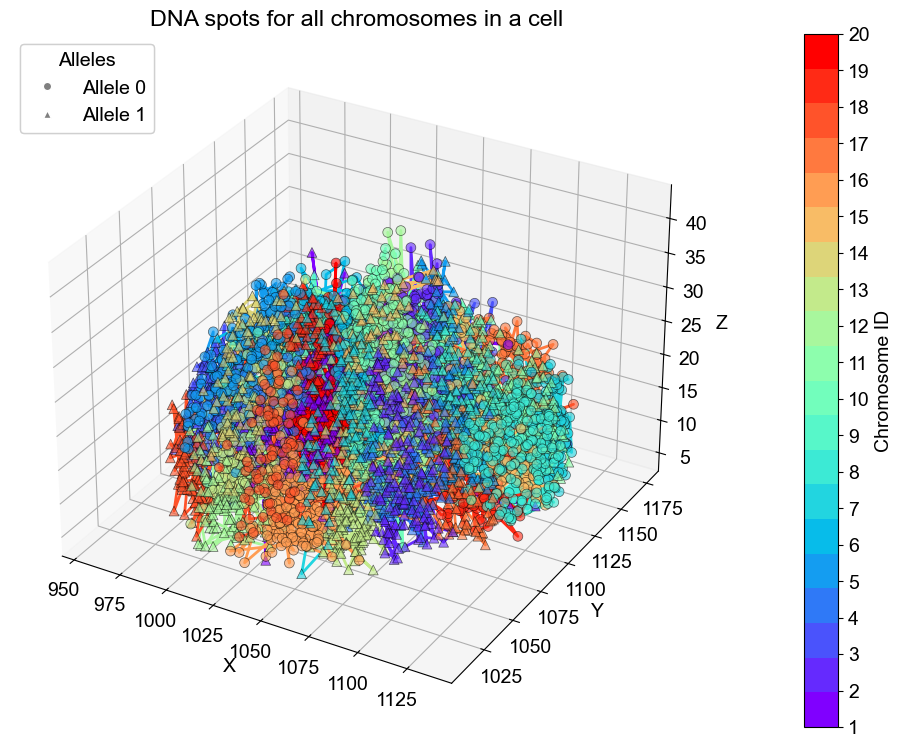

In [7]:
df_filtered = df_preprocessed_align_rep1[(df_preprocessed_align_rep1['cellID'] == 10) & (df_preprocessed_align_rep1['fov'] == 3)]
plotter.plot3D_allchr(df_filtered, path_1, "cellID_10_fov_3_Chrom_all", show = True, save = True)

## 4. Calculate distance matrix for each chromosome

In [12]:
from miceash.matrix import matrix

path_1 = "../test_data"
chromosomes = df_preprocessed_align_rep1["Chrom"].unique()
results = {chrom: matrix(path_1, "DNAseqFISH+1Mbloci-E14-replicate1_preprocessed_marked.csv", chrom, (103, 103, 250)) for chrom in chromosomes}

In [13]:
path_1 = "../test_data"
chromosomes = df_preprocessed_align_rep1["Chrom"].unique()
results = {chrom: matrix(path_1, "DNAseqFISH+1Mbloci-E14-replicate2_preprocessed_marked.csv", chrom, (103, 103, 250)) for chrom in chromosomes}

## 5. Plot the distance matrix for one chromosome

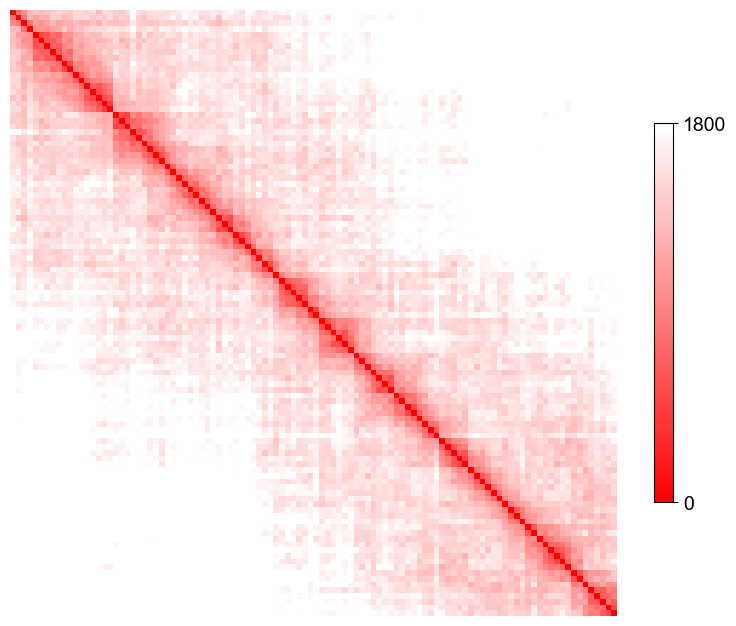

In [14]:
from miceash.plot import DataPlotter
from matplotlib.colors import LinearSegmentedColormap
import os
plotter = DataPlotter()
path_1 = "../test_data"
file_name = "DNAseqFISH+1Mbloci-E14-replicate1_preprocessed_marked_chr12_medi.npy"
cmap = LinearSegmentedColormap.from_list("bright_red", [(1, 0, 0), (1, 1, 1)])
plotter.plot2D(path_1, file_name, C_MIN=None, C_MAX=1800, c=cmap, show=True, save=False)

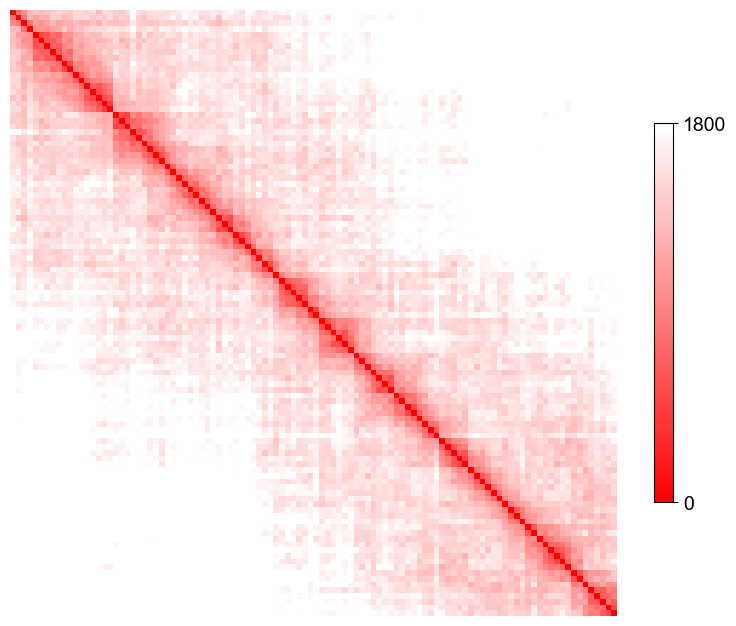

In [15]:
path_1 = "../test_data"
cmap = LinearSegmentedColormap.from_list("bright_red", [(1, 0, 0), (1, 1, 1)])
plotter.plot2D(path_1, file_name, C_MIN=None, C_MAX=1800, c=cmap, show=True, save=False)

In [16]:
chromosomes = df_preprocessed_align_rep1["Chrom"].unique()  # これが事前に定義されている必要があります。
path_1 = "../test_data"
# 各染色体に対してプロット
for chrom in chromosomes:
    file_name = f"DNAseqFISH+1Mbloci-E14-replicate1_preprocessed_marked_{chrom}_medi.npy"
    plotter.plot2D(path_1, file_name, C_MIN=None, C_MAX=1800, c=cmap, show=False, save=True)

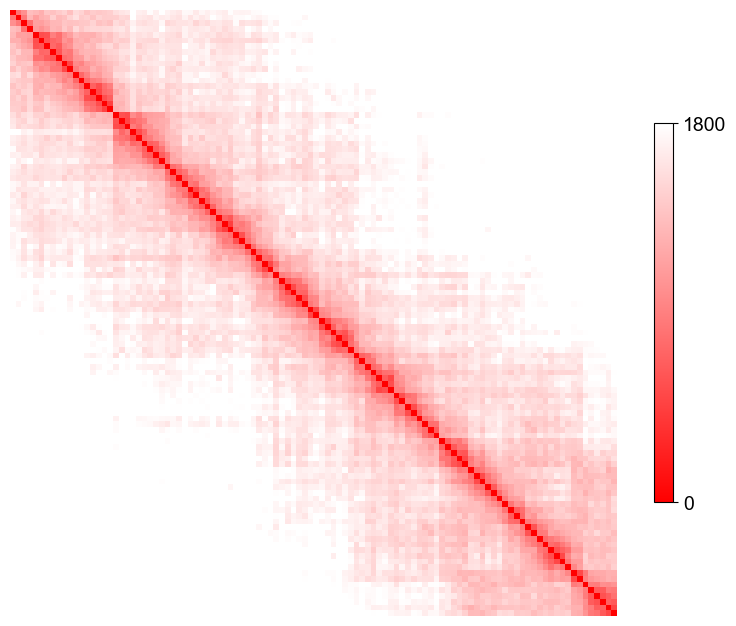

In [17]:
path_1 = "../test_data"
file_name = "DNAseqFISH+1Mbloci-E14-replicate2_preprocessed_marked_chr12_medi.npy"
plotter.plot2D(path_1, file_name, C_MIN=None, C_MAX=1800, c=cmap, show=True, save=False)

In [18]:
chromosomes = df_preprocessed_align_rep1["Chrom"].unique()  # これが事前に定義されている必要があります。
path_1 = "../test_data"
# 各染色体に対してプロット
for chrom in chromosomes:
    file_name = f"DNAseqFISH+1Mbloci-E14-replicate2_preprocessed_marked_{chrom}_medi.npy"
    plotter.plot2D(path_1, file_name, C_MIN=None, C_MAX=1800, c=cmap, show=False, save=True)

## 6. Comparision of genome coordinates and genomic distances

In [9]:
import numpy as np
import os
import pandas as pd

In [12]:
selected_columns = df_preprocessed_rep1[['geneID', 'chromID', 'Chrom', 'Start', 'End', 'hyb']]
filtered_df = selected_columns[selected_columns['Chrom'] == 'chr12']

unique_rows = filtered_df.drop_duplicates().sort_values(('hyb')).reset_index(drop=True)
unique_rows

,geneID,chromID,Chrom,Start,End,hyb
0,chr12-#1,12.0,chr12,3400000.0,3425000.0,0
1,Dnmt3a,12.0,chr12,3794027.0,3819027.0,1
2,chr12-#2,12.0,chr12,5000000.0,5025000.0,2
3,chr12-#3,12.0,chr12,7000000.0,7025000.0,3
4,Laptm4a,12.0,chr12,8909164.0,8934164.0,4
...,...,...,...,...,...,...
101,Wdr60,12.0,chr12,116250522.0,116275522.0,101
102,chr12-#58,12.0,chr12,117000000.0,117025000.0,102
103,Rapgef5,12.0,chr12,117503979.0,117528979.0,103
104,chr12-#59,12.0,chr12,119000000.0,119025000.0,104


In [13]:
def data_in_genome(df):
    df_IDs = df[["geneID", "hyb"]]
    df_XYZ = df[["Start", "End"]]
    data_IDs_2 = df_IDs.values
    data_posi = df_XYZ.values
    return data_IDs_2, data_posi

In [14]:
data_IDs_2, data_posi = data_in_genome(unique_rows)

In [15]:
def dist_genome(data_IDs_2, data_posi):
    
    name = data_IDs_2[:, 0]
    N = np.amax(data_IDs_2[:, 1]) + 1 
    N = int(N)
    # --------------------------------------------------------------------------------------------------
    dist_genome = np.full((N, N), np.nan) 
    index = np.where(data_IDs_2[:, 0] == name)
    if index[0].shape[0] > 1:
        for i in index[0]:
            n = int(data_IDs_2[i, 1])
            for j in index[0]:
                m = int(data_IDs_2[j, 1])
                dist_genome[n, m] = abs(data_posi[i, :].sum()/2 - data_posi[j, :].sum()/2)

    return dist_genome

In [16]:
dist_genome_each = dist_genome(data_IDs_2, data_posi)

In [17]:
medi_total = np.load(os.path.join(path_1, "analysis/output_matrix", "DNAseqFISH+1Mbloci-E14-replicate1_preprocessed_marked_chr12_medi.npy"))
medi_total_flat = medi_total.flatten()
dist_genome_each_flat = dist_genome_each.flatten()

In [18]:
df = pd.DataFrame(data={'coord':dist_genome_each_flat, 'dist': medi_total_flat})
df = df.sort_values('coord')
df.reset_index(inplace=True)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )
    #plt.loglog()

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax

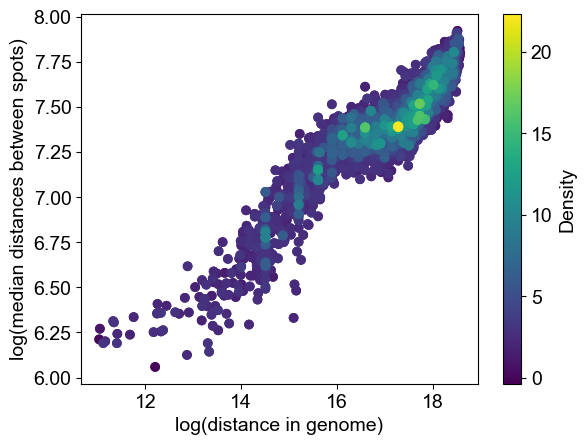

In [21]:
x = df['coord'].values
y = df['dist'].values

positive_mask = (x > 0) & (y > 0)
x_positive = x[positive_mask]
y_positive = y[positive_mask]

log_x = np.log(x_positive)
log_y = np.log(y_positive)

density_scatter(log_x, log_y, bins = [500,500])
plt.xlabel('log(distance in genome)')
plt.ylabel('log(median distances between spots)')
plt.savefig(os.path.join(path_1, "analysis/output_images", "Compare_distance_coordinate_chr12.pdf"))

## 7. Comparison of the distance between loci in seqFISH and the contact probability of Hi-C

In [22]:
import numpy as np
import hicstraw

In [23]:
chromosome_lengths = {
    "chr1": 195471971,
    "chr2": 182113224,
    "chrX": 171031299,
    "chr3": 160039680,
    "chr4": 156508116,
    "chr5": 151834684,
    "chr6": 149736546,
    "chr7": 145441459,
    "chr10": 130694993,
    "chr8": 129401213,
    "chr14": 124902244,
    "chr9": 124595110,
    "chr11": 122082543,
    "chr13": 120421639,
    "chr12": 120129022,
    "chr15": 104043685,
    "chr16": 98207768,
    "chr17": 94987271,
    "chrY": 91744698,
    "chr18": 90702639,
    "chr19": 61431566,
    "chr5_JH584299_random": 953012,
    "chrX_GL456233_random": 336933,
    "chrY_JH584301_random": 259875,
    "chr1_GL456211_random": 241735,
    "chr4_GL456350_random": 227966,
    "chr4_JH584293_random": 207968,
    "chr1_GL456221_random": 206961,
    "chr5_JH584297_random": 205776,
    "chr5_JH584296_random": 199368,
    "chr5_GL456354_random": 195993,
    "chr4_JH584294_random": 191905,
    "chr5_JH584298_random": 184189,
    "chrY_JH584300_random": 182347,
    "chr7_GL456219_random": 175968,
    "chr1_GL456210_random": 169725,
    "chrY_JH584303_random": 158099,
    "chrY_JH584302_random": 155838,
    "chr1_GL456212_random": 153618,
    "chrUn_JH584304": 114452,
    "chrUn_GL456379": 72385,
    "chr4_GL456216_random": 66673,
    "chrUn_GL456393": 55711,
    "chrUn_GL456366": 47073,
    "chrUn_GL456367": 42057,
    "chrUn_GL456239": 40056,
    "chr1_GL456213_random": 39340,
    "chrUn_GL456383": 38659,
    "chrUn_GL456385": 35240,
    "chrUn_GL456360": 31704,
    "chrUn_GL456378": 31602,
    "chrUn_GL456389": 28772,
    "chrUn_GL456372": 28664,
    "chrUn_GL456370": 26764,
    "chrUn_GL456381": 25871,
    "chrUn_GL456387": 24685,
    "chrUn_GL456390": 24668,
    "chrUn_GL456394": 24323,
    "chrUn_GL456392": 23629,
    "chrUn_GL456382": 23158,
    "chrUn_GL456359": 22974,
    "chrUn_GL456396": 21240,
    "chrUn_GL456368": 20208,
    "chrM": 16299,
    "chr4_JH584292_random": 14945,
    "chr4_JH584295_random": 1976,
}

In [24]:
HIC_FILE = "http://hicfiles.s3.amazonaws.com/external/bonev/ES_mapq30.hic"
hic = hicstraw.HiCFile(HIC_FILE)

In [25]:
chr_target = 12
bin_size = 1000000 
whole_chr_length = chromosome_lengths[f'chr{chr_target}']
matrix_object = hic.getMatrixZoomData(f'{chr_target}', f'{chr_target}', "observed", "KR", "BP", bin_size)
numpy_matrix = matrix_object.getRecordsAsMatrix(0, whole_chr_length, 0, whole_chr_length)

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [27]:
# 'chromID', 'Start', 'End', 'hyb'の列だけを抽出して新しいDataFrameを作成
new_df = unique_rows[['chromID', 'Start', 'End', 'hyb']].copy()
new_df_unique = new_df.drop_duplicates()
new_df_sorted = new_df_unique.sort_values(by='hyb').reset_index(drop=True)

In [28]:
import pandas as pd

new_df_sorted['hic_index'] = pd.NA

for loop_count, i in enumerate(range(0,  whole_chr_length, bin_size)):
    start_range = i + 1
    end_range = i + bin_size
    
    new_df_sorted.loc[
        (new_df_sorted['Start'] <= end_range) & 
        (new_df_sorted['End'] >= start_range), 
        'hic_index'] = loop_count

In [29]:
import numpy as np

hic_indices = np.arange(medi_total.shape[0])

hic_mediframe = np.zeros_like(medi_total, dtype=float)

for i in range(len(hic_indices)):
    for j in range(len(hic_indices)):
        
        hic_i = new_df_sorted['hic_index'].iloc[i]  
        hic_j = new_df_sorted['hic_index'].iloc[j]  

        if hic_i < numpy_matrix.shape[0] and hic_j < numpy_matrix.shape[1]:
            hic_mediframe[i, j] = numpy_matrix[hic_i, hic_j]

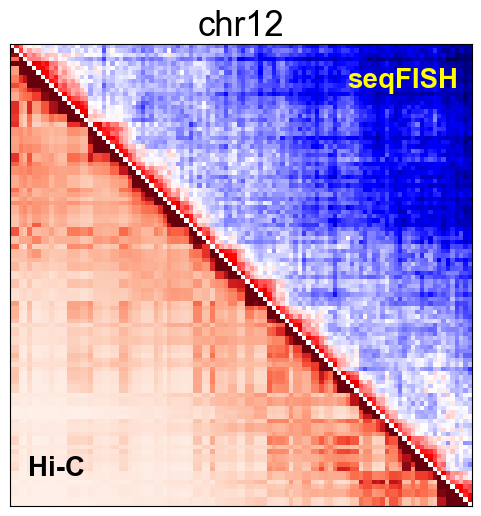

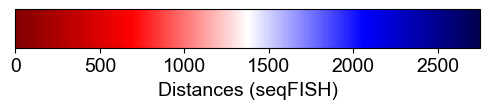

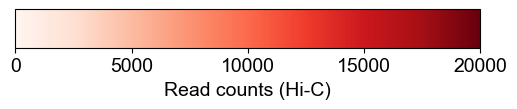

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# 仮のデータを生成（実際にはここでご自身のデータを使用してください）
mean_on_2 = medi_total
mean_off_2 = hic_mediframe
chr_target = chr_target  # 対象のクロモソーム番号

combined_matrix = np.zeros_like(mean_on_2)
combined_matrix[np.triu_indices_from(combined_matrix, k=1)] = mean_on_2[np.triu_indices_from(mean_on_2, k=1)]
combined_matrix[np.tril_indices_from(combined_matrix, k=-1)] = mean_off_2[np.tril_indices_from(mean_off_2, k=-1)]

threshold_on_upper = 3000
threshold_off_lower = 20000

fig, axs = plt.subplots(figsize=(6, 6))
cmap_hic = plt.get_cmap("seismic_r")
cmap_dist = plt.get_cmap("Reds")
cmap_dist.set_bad(alpha=0)  

clipped_upper = np.clip(combined_matrix, 0, threshold_on_upper)
clipped_lower = np.clip(combined_matrix, 0, threshold_off_lower)  

mask_up = np.triu(np.ones_like(combined_matrix), k=1).astype(bool)
mask_low = np.tril(np.ones_like(combined_matrix), k=-1).astype(bool)

img_upper = axs.imshow(np.ma.masked_where(~mask_up, clipped_upper), cmap=cmap_hic, vmin=0, interpolation='nearest')
img_lower = axs.imshow(np.ma.masked_where(~mask_low, clipped_lower), cmap=cmap_dist, vmin=0, interpolation='nearest')

axs.set_title("chr{}".format(chr_target), fontsize=25)

axs.text(0.85, 0.92, 'seqFISH', color='yellow', fontweight='bold', horizontalalignment='center', verticalalignment='center', transform=axs.transAxes, fontsize=20)
axs.text(0.10, 0.08, 'Hi-C', color='black', fontweight='bold', horizontalalignment='center', verticalalignment='center', transform=axs.transAxes, fontsize=20)

axs.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.savefig(os.path.join(path_1, "analysis/output_images", "Heatmap_distance_hiccontact_chr12.pdf"))


# カラーバー用の新しい図を作成し、カラーバーを描画（seqFISH）
fig2, ax2 = plt.subplots(figsize=(6, 0.5))
cbar = fig2.colorbar(img_upper, cax=ax2, orientation='horizontal')  # 修正: img_upper を使用
cbar.set_label('Distances (seqFISH)')
plt.savefig(os.path.join(path_1, "analysis/output_images", "Heatmap_distance_hiccontact_chr12_colorbat1.pdf"))


# カラーバー用の新しい図を作成し、カラーバーを描画（Hi-C）
fig3, ax3 = plt.subplots(figsize=(6, 0.5))
cbar2 = fig3.colorbar(img_lower, cax=ax3, orientation='horizontal')  # 修正: img_lower を使用
cbar2.set_label('Read counts (Hi-C)')
plt.savefig(os.path.join(path_1, "analysis/output_images", "Heatmap_distance_hiccontact_chr12_colorbat2.pdf"))

plt.show()

## 8. Distances of seqFISH and contact probability of Hi-C data

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs ):
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )
    #plt.loglog()

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax

Correlation coefficient: -0.914


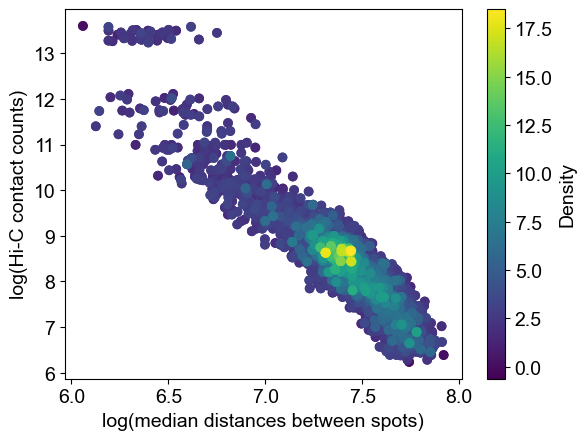

In [33]:
x = medi_total.flatten()
y = hic_mediframe.flatten()

positive_mask = (x > 0) & (y > 0)
x_positive = x[positive_mask]
y_positive = y[positive_mask]

log_x = np.log(x_positive)
log_y = np.log(y_positive)

density_scatter(log_x, log_y, bins = [500,500])
plt.xlabel('log(median distances between spots)')
plt.ylabel('log(Hi-C contact counts)')
plt.savefig(os.path.join(path_1, "analysis/output_images", "Compare_distance_hiccontact_chr12.pdf"))

correlation_matrix = np.corrcoef(log_x, log_y)
correlation_coefficient = correlation_matrix[0, 1]

print(f"Correlation coefficient: {correlation_coefficient:.3f}")

## 9. Contact frequency with various threshold

In [34]:
import math

def freq(distance, theshold=350):
    N = distance.shape[0]
    Sigma2 = np.zeros((N, N))
    
    for n in range(N):
        for m in range(n, N):
            if math.isnan(distance[n, m]):
                Sigma2[n, m] = Sigma2[m, n] = np.nan
            elif distance[n, m] < theshold:
                Sigma2[n, m] = Sigma2[m, n] = 1
            else:
                Sigma2[n, m] = Sigma2[m, n] = 0

    return Sigma2


def freq_stack(distance, thre_nm=350):
    n_rows, n_cols, n_data = distance.shape
    
    c_e_2 = np.full((n_rows, n_cols), np.nan)

    for cell_num in range(distance.shape[2]):
        example = freq(distance[:,:,cell_num], thre_nm)
        c_e_2 = np.dstack([c_e_2, example])
    
    return c_e_2

def np_mean(distance):
    N = distance.shape[0]
    Sigma2 = np.zeros((N, N))
    
    for n in range(N):
        for m in range(n + 1, N):
            Sigma2[n, m] = Sigma2[m, n] = np.nanmean(distance[n, m, :])

    return Sigma2

In [35]:
distance = np.load(os.path.join(path_1, "analysis/output_matrix", "DNAseqFISH+1Mbloci-E14-replicate1_preprocessed_marked_chr12_distance.npy"))

In [36]:
import numpy as np
import matplotlib.pyplot as plt

correlation_coefficients = []

for thre in range(100, 2000, 100):
    print (thre)
    c_e_2 = freq_stack(distance, thre_nm=thre)
    freq_mean = np_mean(c_e_2)

    x = freq_mean.flatten()
    y = hic_mediframe.flatten()

    positive_mask = (x > 0) & (y > 0)
    x_positive = x[positive_mask]
    y_positive = y[positive_mask]

    log_x = np.log(x_positive)
    log_y = np.log(y_positive)

    correlation_matrix = np.corrcoef(log_x, log_y)

    correlation_coefficient = correlation_matrix[0, 1]

    correlation_coefficients.append(correlation_coefficient)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


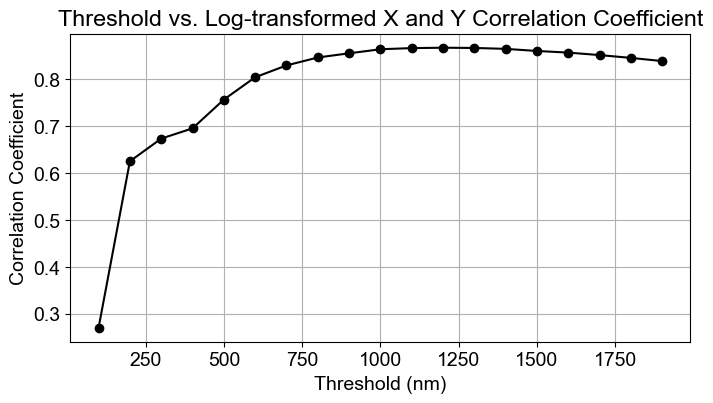

In [37]:
thresholds = np.arange(100, 2000, 100)
plt.figure(figsize=(8, 4))
plt.plot(thresholds, correlation_coefficients, marker='o', linestyle='-', c = 'black')
plt.title('Threshold vs. Log-transformed X and Y Correlation Coefficient')
plt.xlabel('Threshold (nm)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.savefig(os.path.join(path_1, "analysis/output_images", "Threshold_distance_hiccontact_chr12.pdf"))
plt.show()